# K-Fold Cross Validation Technique and its Essentials
**Thanks to :** [K-Fold Cross Validation Technique](https://www.analyticsvidhya.com/blog/2022/02/k-fold-cross-validation-technique-and-its-essentials/)

#### [class sklearn.model_selection.KFold(n_splits=5, *, shuffle=False, random_state=None)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)

# K-Folds cross-validator
* Provides *train/test indices to split data into **train/test sets**.*
* Split the dataset into **k consecutive folds** (without shuffling by default).
* Each fold is then used once as a **validation set** in turn while the remaining **k - 1** folds are used for **training**
* This process is repeated **k times,** and **performance metrics** such as
 * accuracy,
 * precision, and
 * recall <br>
are computed for each fold.
* By averaging these metrics, we obtain an estimate of the **model’s generalization performance.**

#### def split(X, y=None, groups=None)
Generate indices to split data into training and test set.

##### Parameters
X : array-like of shape (n_samples, n_features)

    Training data, where n_samples is the number of samples and n_features is the number of features.

y : array-like of shape (n_samples,), default=None

    The target variable for supervised learning problems.

groups : array-like of shape (n_samples,), default=None

    Group labels for the samples used while splitting the dataset into train/test set.

Yields<br>
train : ndarray

    The training set indices for that split.

test : ndarray

    The testing set indices for that split.

# 1. Dataset Description
### train and test array and their split by using K-Fold as an array in every iteration.

### implementation of K-Fold Cross Validation; K = 5
#### **shuffle = False**; dataset will get shuffle in each iteration and each datapoint may not get the chance to be consider as a train and test set part.

In [1]:
from sklearn.model_selection import KFold
import numpy as np

data = np.array([5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100])

print("\n len(np.data)".ljust(50, ' '), " : ", len(data))

kf = KFold(n_splits=5, shuffle=False)

print("\n get_n_splits".ljust(50, ' '), " : ", kf.get_n_splits())
print("\n n_splits".ljust(50, ' '), " : ", kf.n_splits)
print("\n shuffle".ljust(50, ' '), " : ", kf.shuffle)
print()
i = 1
for train, test in kf.split(data):
   print(" Train %d : %s  Test: %s" % (i, data[train], data[test]))
   i += 1

print("\nLength of 'train set' array in each fold".ljust(50, ' '), " : ", len(train))
print("\nLength of 'test set' array in each fold".ljust(50, ' '), " : ", len(test))


 len(np.data)                                      :  20

 get_n_splits                                      :  5

 n_splits                                          :  5

 shuffle                                           :  False

 Train 1 : [ 25  30  35  40  45  50  55  60  65  70  75  80  85  90  95 100]  Test: [ 5 10 15 20]
 Train 2 : [  5  10  15  20  45  50  55  60  65  70  75  80  85  90  95 100]  Test: [25 30 35 40]
 Train 3 : [  5  10  15  20  25  30  35  40  65  70  75  80  85  90  95 100]  Test: [45 50 55 60]
 Train 4 : [  5  10  15  20  25  30  35  40  45  50  55  60  85  90  95 100]  Test: [65 70 75 80]
 Train 5 : [ 5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80]  Test: [ 85  90  95 100]

Length of 'train set' array in each fold           :  16

Length of 'test set' array in each fold            :  4


### implementation of K-Fold Cross Validation; K = 5
#### **shuffle = True**; dataset will get shuffle in each iteration and each datapoint may not get the chance to be consider as a train and test set part.

In [2]:
from sklearn.model_selection import KFold
import numpy as np

data = np.array([5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100])

print("\n len(np.data)".ljust(50, ' '), " : ", len(data))

kf = KFold(n_splits=5, shuffle=True)

print("\n get_n_splits".ljust(50, ' '), " : ", kf.get_n_splits())
print("\n n_splits".ljust(50, ' '), " : ", kf.n_splits)
print("\n shuffle".ljust(50, ' '), " : ", kf.shuffle)
print()
i = 1
for train, test in kf.split(data):
   print(" Train %d : %s  Test: %s" % (i, data[train], data[test]))
   i += 1

print("\nLength of 'train set' array in each fold".ljust(50, ' '), " : ", len(train))
print("\nLength of 'test set' array in each fold".ljust(50, ' '), " : ", len(test))


 len(np.data)                                      :  20

 get_n_splits                                      :  5

 n_splits                                          :  5

 shuffle                                           :  True

 Train 1 : [  5  15  20  25  30  40  45  50  55  60  65  70  80  85  95 100]  Test: [10 35 75 90]
 Train 2 : [  5  10  15  25  30  35  40  50  60  65  75  80  85  90  95 100]  Test: [20 45 55 70]
 Train 3 : [10 15 20 25 30 35 40 45 50 55 60 65 70 75 85 90]  Test: [  5  80  95 100]
 Train 4 : [  5  10  15  20  25  30  35  45  55  60  70  75  80  90  95 100]  Test: [40 50 65 85]
 Train 5 : [  5  10  20  35  40  45  50  55  65  70  75  80  85  90  95 100]  Test: [15 25 30 60]

Length of 'train set' array in each fold           :  16

Length of 'test set' array in each fold            :  4


# 2. Import libraries

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_digits

import numpy as np
import matplotlib.pyplot as plt

# 3. Load dataset
## 3.1 Let's do this for hand-written digits dataset

In [4]:
digit_data = load_digits()
print("\n dir(digit_data)".ljust(40, ' '),dir(digit_data))
print("\n len(digit_data['data'])".ljust(40, ' '),len(digit_data['data']))
print("\n len(digit_data['target'])".ljust(40, ' '),len(digit_data['target']))


 dir(digit_data)                        ['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

 len(digit_data['data'])                1797

 len(digit_data['target'])              1797


## 3.2 Load digit data set and split into training and test set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(digit_data['data'], digit_data['target'], test_size=0.3)
print("\n len(X_train)".ljust(40, ' '),len(X_train))
print("\n len(X_test)".ljust(40, ' '),len(X_test))
print("\n len(y_train)".ljust(40, ' '),len(y_train))
print("\n len(y_test)".ljust(40, ' '),len(y_test))


 len(X_train)                           1257

 len(X_test)                            540

 len(y_train)                           1257

 len(y_test)                            540


# 4. Dataset EDA (Exploratory Data Analysis)
## 4.1 Logistic Regression
Use ***liblinear***. This is the **“Large Linear Classification”** category.

It uses a Coordinate-Descent Algorithm. This would minimize a **multivariate** function by resolving the **univariate** and its optimization problems during the loop.

In [6]:
lr = LogisticRegression(solver="liblinear", multi_class='ovr')

# training the data set
lr.fit(X_train, y_train)

# check the score from the model
lr.score(X_test, y_test)

0.9666666666666667

# SVC
Author want to just use **"gamma"** as a parameter for non-linear perspective for hyperplanes. The value of the gamma tries to fit the training data set and uses **"1/n_features"**.

In [7]:
svm = SVC(gamma='auto')

# training the data set
svm.fit(X_train, y_train)

# check the score from the model
svm.score(X_test, y_test)

0.31666666666666665

# Random Forest Classification
For RFC, author want to use 40 trees as an estimators as 40.

In [8]:
rfc = RandomForestClassifier(n_estimators=40)

# training the data set
rfc.fit(X_train, y_train)

# check the score from the model
rfc.score(X_test, y_test)

0.975925925925926

Scores from the above list of algorithms
1. Logistic Regression,
2. Random Forest,
3. Support Vector Machine

compare to each other for better selection.




#### Now, author is trying to use here **"cross_val_score"** function to get the scores, by passing different algorithms with digit dataset and
#### **cv**: cross-validation generator or an iterable, default=None

Which determines the cross-validation splitting strategy

In [9]:
# score_lr = cross_val_score(LogisticRegression(solver="liblinear", multi_class='ovr'),\
                          #  digit_data['data'], digit_data['target'], cv=3)
score_lr = cross_val_score(lr, digit_data['data'], digit_data['target'], cv=5)
print("\n Logistic Regression")
print("\n score_lr".ljust(40, ' '), score_lr)
print("\n Average score_lr".ljust(40, ' '), np.average(score_lr))


 Logistic Regression

 score_lr                               [0.92222222 0.88333333 0.95264624 0.95821727 0.89415042]

 Average score_lr                       0.9221138966264315


In [10]:
score_lr = cross_val_score(svm, digit_data['data'], digit_data['target'], cv=5)
print("\n Support Vector Machine")
print("\n score_lr".ljust(40, ' '), score_lr)
print("\n Average score_lr".ljust(40, ' '), np.average(score_lr))


 Support Vector Machine

 score_lr                               [0.41111111 0.45       0.454039   0.44846797 0.47910864]

 Average score_lr                       0.448545341999381


In [11]:
score_lr = cross_val_score(rfc, digit_data['data'], digit_data['target'], cv=5)
print("\n Random Forest Classifier")
print("\n score_lr".ljust(40, ' '), score_lr)
print("\n Average score_lr".ljust(40, ' '), np.average(score_lr))


 Random Forest Classifier

 score_lr                               [0.93055556 0.88888889 0.96100279 0.97214485 0.89415042]

 Average score_lr                       0.9293484989167441


Based on the above observation, author wants to stick with Random Forest Classifier for this dataset for production.

# Parameter Tuning Using K-Fold
#### Now, author want to consider the RandomForestClassifier for this analysis, and keeping changing **"n_estimators"** parameter for this case while keeping the **"CV"** constant as 10 (commonly used)

In [12]:
rfc = RandomForestClassifier(n_estimators=20)
score_lr = cross_val_score(rfc, digit_data['data'], digit_data['target'], cv=10)
print("\n Random Forest Classifier with 20 tress")
print("\n score_lr".ljust(40, ' '), score_lr)
print("\n Average score_lr".ljust(40, ' '), np.average(score_lr))


 Random Forest Classifier with 20 tress

 score_lr                               [0.9        0.95       0.91666667 0.9        0.93888889 0.96666667
 0.96666667 0.97206704 0.91620112 0.94413408]

 Average score_lr                       0.937129112352576


In [13]:
rfc = RandomForestClassifier(n_estimators=30)
score_lr = cross_val_score(rfc, digit_data['data'], digit_data['target'], cv=10)
print("\n Random Forest Classifier with 30 tress")
print("\n score_lr".ljust(40, ' '), score_lr)
print("\n Average score_lr".ljust(40, ' '), np.average(score_lr))


 Random Forest Classifier with 30 tress

 score_lr                               [0.9        0.97222222 0.91111111 0.91666667 0.96666667 0.96666667
 0.98888889 0.97206704 0.9273743  0.94413408]

 Average score_lr                       0.9465797641216636


In [14]:
rfc = RandomForestClassifier(n_estimators=40)
score_lr = cross_val_score(rfc, digit_data['data'], digit_data['target'], cv=10)
print("\n Random Forest Classifier with 40 tress")
print("\n score_lr".ljust(40, ' '), score_lr)
print("\n Average score_lr".ljust(40, ' '), np.average(score_lr))


 Random Forest Classifier with 40 tress

 score_lr                               [0.9        0.97222222 0.94444444 0.92777778 0.97222222 0.96666667
 0.97222222 0.95530726 0.9273743  0.95530726]

 Average score_lr                       0.9493544382371197


# K-Fold in Visual form
Visual representation is always the best evidence for any data which is located across the axes.

#### class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)[source]

### n_neighborsint, (default=5) Number of neighbors


In [15]:
knn = KNeighborsClassifier()
score_knn = cross_val_score(knn, digit_data['data'], digit_data['target'], cv=10)
print("\n KNeighborsClassifier")
print("\n score_lr".ljust(40, ' '), score_knn)
print("\n Average score_lr".ljust(40, ' '), np.average(score_lr))


 KNeighborsClassifier

 score_lr                               [0.92777778 0.98333333 0.97777778 0.95555556 0.97222222 0.97222222
 0.99444444 0.98324022 0.98324022 0.96648045]

 Average score_lr                       0.9493544382371197


In [16]:
knn_range = list(range(1, 12))
knn_score = []

for k in knn_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  k_score = cross_val_score(knn, digit_data['data'], digit_data['target'], cv=10, scoring='accuracy')
  knn_score.append(k_score.mean())

print("\nKNeighborsClassifier with different neighors")
print("Knn range\tKnn score")

# print("\n Knn score")
# print("%.3f" % knn_score)
round_off = ['%.3f' % score for score in  knn_score]
# print("{:.2f}".format(round(knn_score, 2)))

# print(len(round_off))
for k in range(1, len(round_off)):
  # print("".ljust(4, ''), round_off[k], end='')
  print(k,"\t\t",round_off[k])

# for k in knn_range:
#   # print("".ljust(6, ' '), k, end='')
#   print(k,"\t",round_off[k])
# print(round_off)





KNeighborsClassifier with different neighors
Knn range	Knn score
1 		 0.974
2 		 0.977
3 		 0.972
4 		 0.972
5 		 0.968
6 		 0.968
7 		 0.965
8 		 0.965
9 		 0.962
10 		 0.964


# Visualization by using Matplotlib

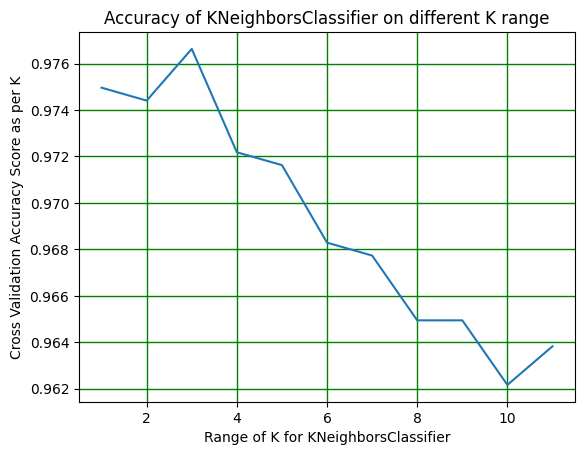

In [17]:
%matplotlib inline
plt.plot(knn_range, knn_score)
plt.title("Accuracy of KNeighborsClassifier on different K range")
plt.xlabel("Range of K for KNeighborsClassifier")
plt.ylabel("Cross Validation Accuracy Score as per K")
# plt.grid(color='r', linestyle='-', linewidth=1, animated=False)
plt.grid(c='g', ls='-', lw=1, fillstyle='full')